<a href="https://colab.research.google.com/github/rohitrmd/diffusers-introduction/blob/main/Diffusers_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Diffusers

Diffusers is the library from Hugging Face to generate images and audios using diffusion ML models. It makes it easier for us to generate these artifacts without writing low level pytorch code. On Diffuser's [home page](https://huggingface.co/docs/diffusers/index), they claim they prefer usability over performance.

### Installation
To start using diffusers, first install diffusers library

In [1]:
pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.7 MB/s eta 0:00:00


### Loading models using DiffusionPipeline
DiffusionPipeline is the class using which you can load any models hosted on the HuggingFace. The way to load any model from Hugging Face is to provide relative path of the model hosted on their website.

Let's load runwayml/stable-diffusion-v1-5 model from HuggingFace.

This will fail with error:


```
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
```
You can solve this issue by creating account on huggingface and creating the token here: https://huggingface.co/settings/tokens.
After that, add that token over the secrets section of the notebook as value of HF_TOKEN secret.


In [7]:
import torch
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float32)
pipeline.to("cuda")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.25.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

### Inference
Once the pipeline instance is available, you can generate image by providing textual prompt.

  0%|          | 0/50 [00:00<?, ?it/s]

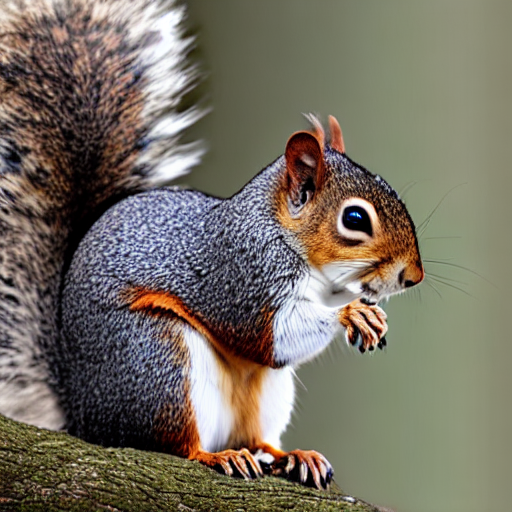

In [11]:
image = pipeline("An image of a squirrel", num_inference_steps = 50).images[0]
image